In [2]:
import matplotlib.pyplot as plt
from addict import Dict
import sys, os
sys.path.append(os.path.realpath(".."))

In [3]:
import util_funcs

Using Theano backend.


In [5]:
m = util_funcs.get_mongo_client()

In [9]:
runs = m.get_database("sacred").get_collection("runs")

In [16]:
run = Dict(runs.find_one(filter={"_id":6963}))

In [18]:
history = run.result.history

In [19]:
history.keys()

dict_keys(['classify_acc', 'classify_loss', 'decode_loss', 'detect_acc', 'detect_f1', 'detect_loss', 'detect_sensitivity', 'detect_specificity', 'loss', 'lr', 'montage_binary_accuracy', 'montage_loss', 'patient_acc', 'patient_loss', 'val_classify_acc', 'val_classify_loss', 'val_decode_loss', 'val_detect_acc', 'val_detect_f1', 'val_detect_loss', 'val_detect_sensitivity', 'val_detect_specificity', 'val_loss', 'val_montage_binary_accuracy', 'val_montage_loss', 'val_patient_acc', 'val_patient_loss'])

# First attempt at multitask seizure detection

Text(0.5, 0, 'Epochs')

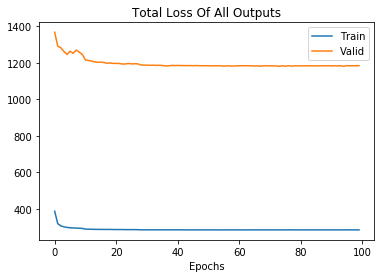

In [23]:
plt.title("Total Loss Of All Outputs")
plt.plot(history["loss"])
plt.plot(history["val_loss"])
plt.legend(["Train", "Valid"])
plt.xlabel("Epochs")

Text(0.5, 0, 'Num Epochs')

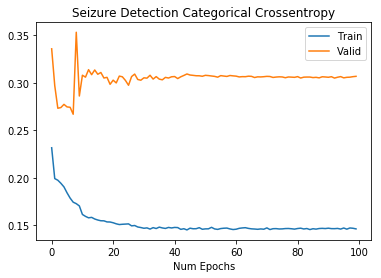

In [27]:
plt.title("Seizure Detection Categorical Crossentropy")
plt.plot(history.detect_loss)
plt.plot(history.val_detect_loss)
plt.legend(["Train", "Valid"])
plt.xlabel("Num Epochs")

Text(0.5, 0, 'Num Epochs')

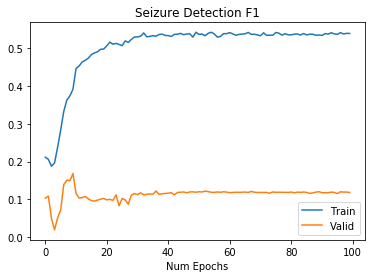

In [28]:
plt.title("Seizure Detection F1")
plt.plot(history.detect_f1)
plt.plot(history.val_detect_f1)
plt.legend(["Train", "Valid"])
plt.xlabel("Num Epochs")

Text(0.5, 0, 'Num Epochs')

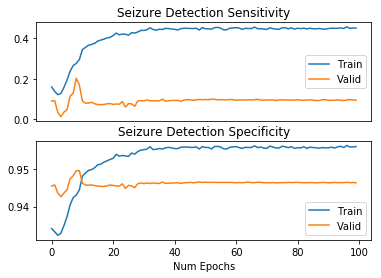

In [36]:
plt.subplot(2,1,1)
plt.title("Seizure Detection Sensitivity")
plt.plot(history.detect_sensitivity)
plt.plot(history.val_detect_sensitivity)
plt.legend(["Train", "Valid"])
plt.xticks([])
plt.subplot(2,1,2)
plt.title("Seizure Detection Specificity")
plt.plot(history.detect_specificity)
plt.plot(history.val_detect_specificity)
plt.legend(["Train", "Valid"])
plt.xlabel("Num Epochs")

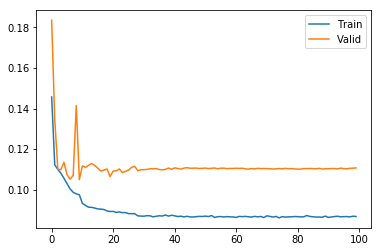

In [13]:
plt.plot(history.montage_loss)
plt.plot(history.val_montage_loss)
plt.legend(["Train", "Valid"])

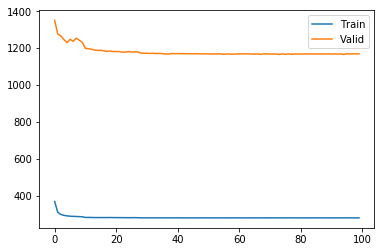

In [14]:
plt.plot(history.decode_loss)
plt.plot(history.val_decode_loss)
plt.legend(["Train", "Valid"])

# second attempt with fewer outputs

In [37]:
run = Dict(runs.find_one(filter={"_id":6970}))

In [40]:
history = run.result.history

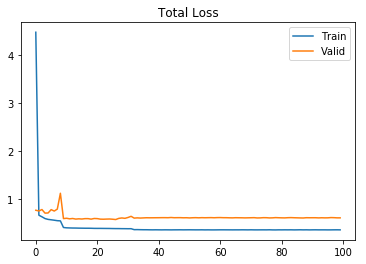

In [44]:
plt.title("Total Loss")
plt.plot(history.loss)
plt.plot(history.val_loss)
plt.legend(["Train", "Valid"])

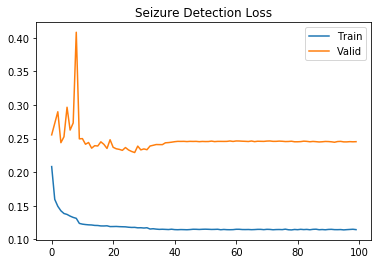

In [45]:
plt.title("Seizure Detection Loss")
plt.plot(history.detect_loss)
plt.plot(history.val_detect_loss)
plt.legend(["Train", "Valid"])